# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Overview

In [2]:
df = pd.read_csv('cluster_blobs.csv')
df.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


In [3]:
print(f'this dataset contains of {df.shape[0]} rows and {df.shape[1]} columns')

this dataset contains of 1500 rows and 2 columns


In [4]:
df.isnull().sum()

X1    0
X2    0
dtype: int64

In [10]:
df2 = moons = pd.read_csv('cluster_moons.csv')
df2.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


In [11]:
print(f'this dataset contains of {df2.shape[0]} rows and {df2.shape[1]} columns')

this dataset contains of 1500 rows and 2 columns


In [12]:
df2.isnull().sum()

X1    0
X2    0
dtype: int64

In [13]:
df3 = pd.read_csv('cluster_circles.csv')
df3.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


In [14]:
print(f'this dataset contains of {df3.shape[0]} rows and {df3.shape[1]} columns')

this dataset contains of 1500 rows and 2 columns


# Data Exploration

<AxesSubplot:xlabel='X1', ylabel='X2'>

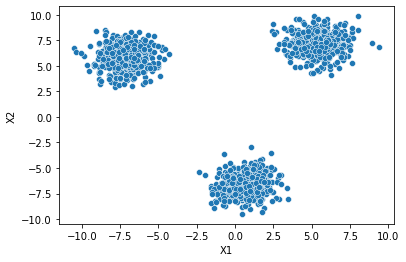

In [8]:
# df
sns.scatterplot(data=df,x='X1',y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

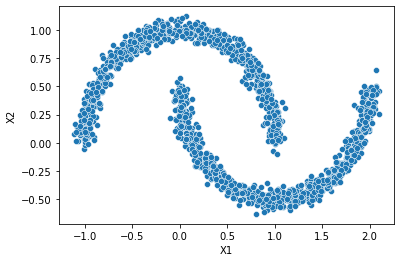

In [9]:
# data
sns.scatterplot(data=data,x='X1',y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

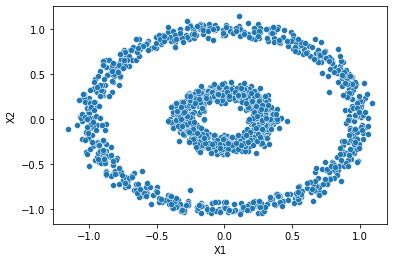

In [15]:
sns.scatterplot(data=df3,x='X1',y='X2')

# Clustering

In [16]:
# build a function
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

## KMeans vs Hierarchical vs DBScan : Dataset DF

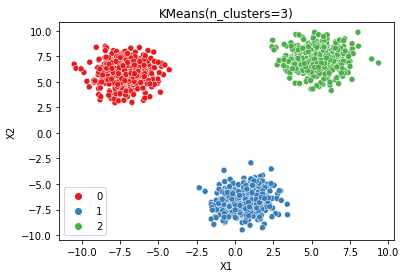

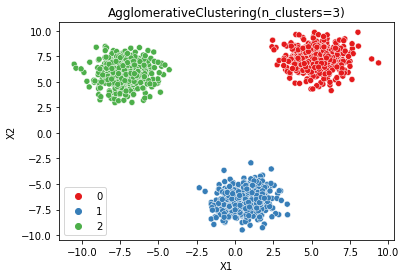

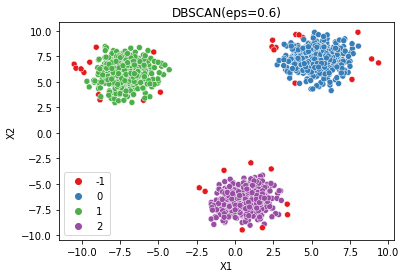

In [39]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

model_kmeans = KMeans(n_clusters = 3)
model_agglomerative = AgglomerativeClustering(n_clusters=3)
model_dbscan = DBSCAN(eps=0.6)

model = [model_kmeans, model_agglomerative, model_dbscan]

for i in model:
    display_categories(i, df)
    plt.title(i, fontsize=12)
    plt.show()

## KMeans vs Hierarchical vs DBScan : Dataset DF2

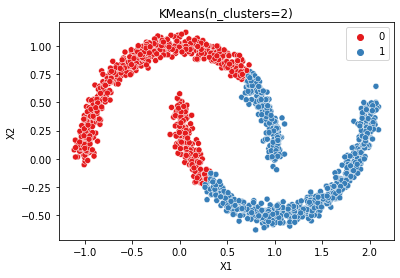

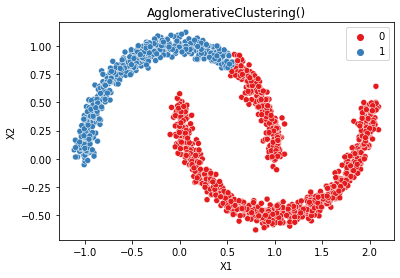

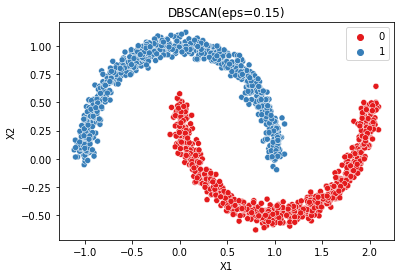

In [47]:
model_kmeans = KMeans(n_clusters = 2)
model_agglomerative = AgglomerativeClustering(n_clusters=2)
model_dbscan = DBSCAN(eps=0.15)

model = [model_kmeans, model_agglomerative, model_dbscan]

for i in model:
    display_categories(i, df2)
    plt.title(i, fontsize=12)
    plt.show()

## KMeans vs Hierarchical vs DBScan : Dataset DF3

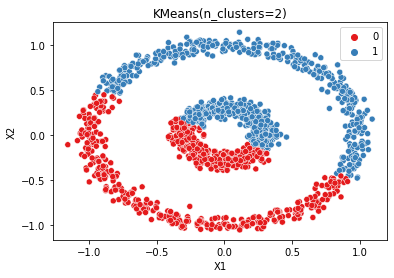

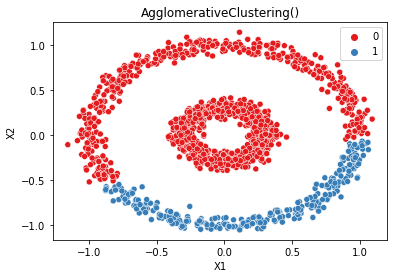

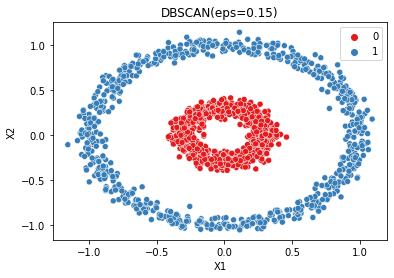

In [48]:
model_kmeans = KMeans(n_clusters = 2)
model_agglomerative = AgglomerativeClustering(n_clusters=2)
model_dbscan = DBSCAN(eps=0.15)

model = [model_kmeans, model_agglomerative, model_dbscan]

for i in model:
    display_categories(i, df3)
    plt.title(i, fontsize=12)
    plt.show()

# DBScan Hyperparameter

## Dataset Overview

In [49]:
# new dataset 
two_blobs = pd.read_csv('cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

In [96]:
two_blobs.shape, two_blobs_outliers.shape

((1000, 2), (1003, 2))

<AxesSubplot:xlabel='X1', ylabel='X2'>

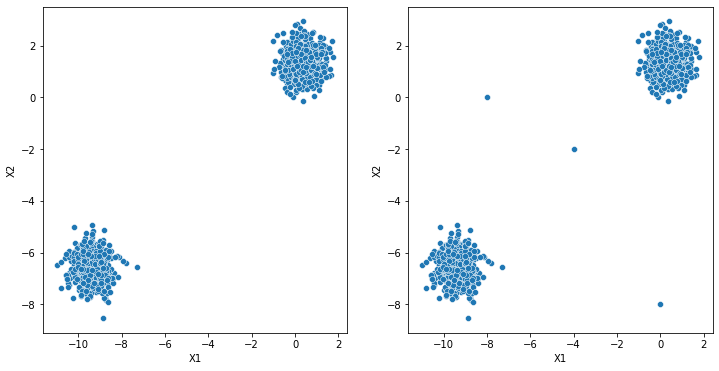

In [60]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=two_blobs,x='X1',y='X2', ax=axes[0])
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2', ax=axes[1])

## DBSCAN

In [84]:
# function to run clustering
def display_categories(model,data,axes,title):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1', ax=axes).set(title=title)

In [54]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()

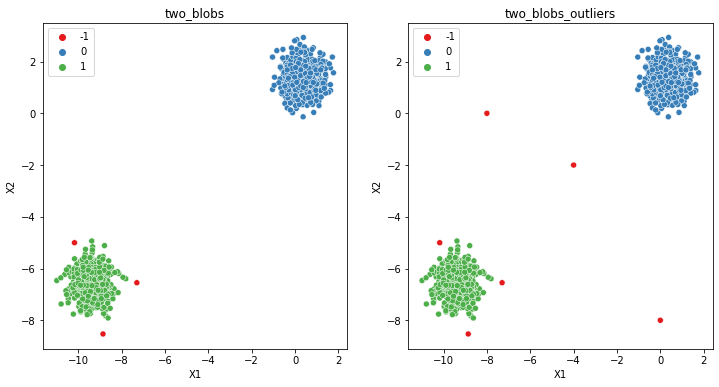

In [85]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

display_categories(dbscan,two_blobs,axes[0],'two_blobs')
display_categories(dbscan,two_blobs_outliers,axes[1],'two_blobs_outliers')

## Epsilon

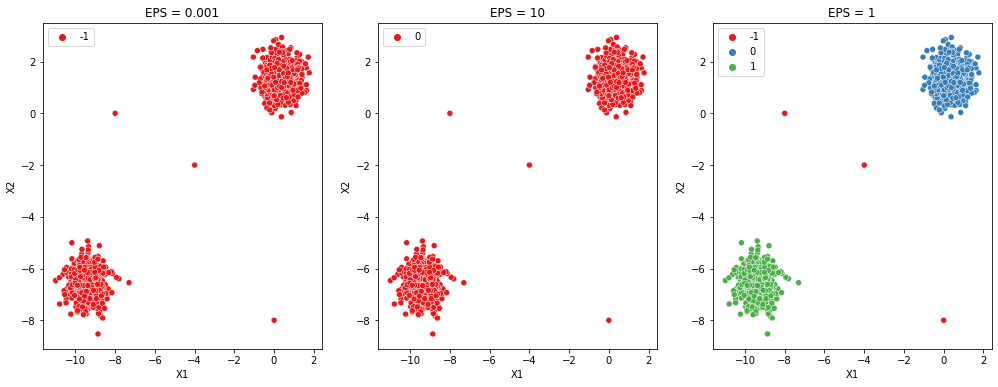

In [91]:
# Tiny Epsilon --> Tiny Max Distance --> Everything is an outlier (class=-1)
dbscan1 = DBSCAN(eps=0.001)

# Huge Epsilon --> Huge Max Distance --> Everything is in the same cluster (class=0)
dbscan2 = DBSCAN(eps=10)

# Try Epsilon = 1
dbscan3 = DBSCAN(eps=1)

fig, axes = plt.subplots(1,3,figsize=(17,6))
display_categories(dbscan1,two_blobs_outliers,axes[0],'EPS = 0.001')
display_categories(dbscan2,two_blobs_outliers,axes[1],'EPS = 10')
display_categories(dbscan3,two_blobs_outliers,axes[2],'EPS = 1')

In [108]:
# lets use DBSCAN(eps=1)
# find number of outliers

np.sum(dbscan3.labels_ == -1)

3

In [111]:
#how many percent this 3 outliers compared to whole dataset?
print('how many percent this 3 outliers compared to whole dataset?')
print(round(100 * np.sum(dbscan3.labels_ == -1) / len(dbscan3.labels_),3),'%')

how many percent this 3 outliers compared to whole dataset?
0.299 %


In [112]:
# Charting reasonable Epsilon values

outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

### Percentage Outliers

Text(0.52, 2.5, 'Ideal outliers are 1%-5%')

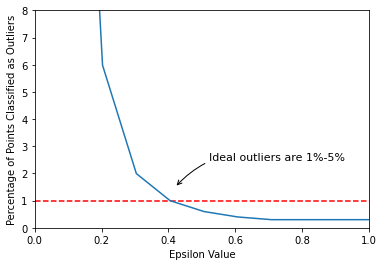

In [127]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)
plt.ylim(0,8)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

plt.annotate(xy=(0.42,1.5), xytext=(0.42+0.1,1.5+1), 
             text='Ideal outliers are 1%-5%',
             fontsize=11,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.3"))

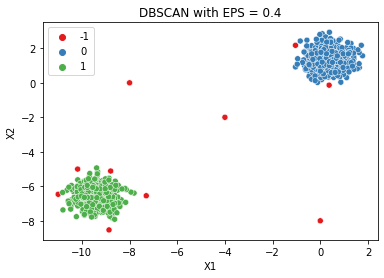

In [130]:
# re write the clustering function
def display_categories(model,data,title):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1').set(title=title)

dbscan = DBSCAN(eps=0.4)
display_categories(dbscan,two_blobs_outliers,'DBSCAN with EPS = 0.4')

### Number of Outliers

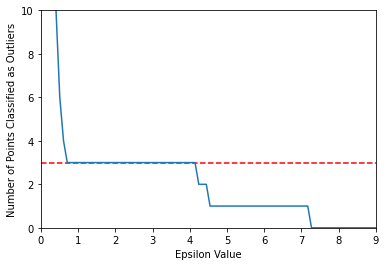

In [132]:
# Do we want to think in terms of number of outliers targeting instead?
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,9)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

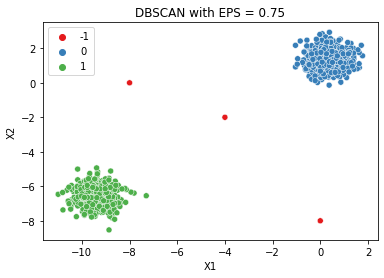

In [134]:
# since we have only 3 datapoints recognized as outliers, we will set eps=0.75
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan,two_blobs_outliers,'DBSCAN with EPS = 0.75')

## Minimum Samples

In [145]:
# re write the clustering function
def display_categories(model,data,axes,title):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1', ax=axes).set(title=title)

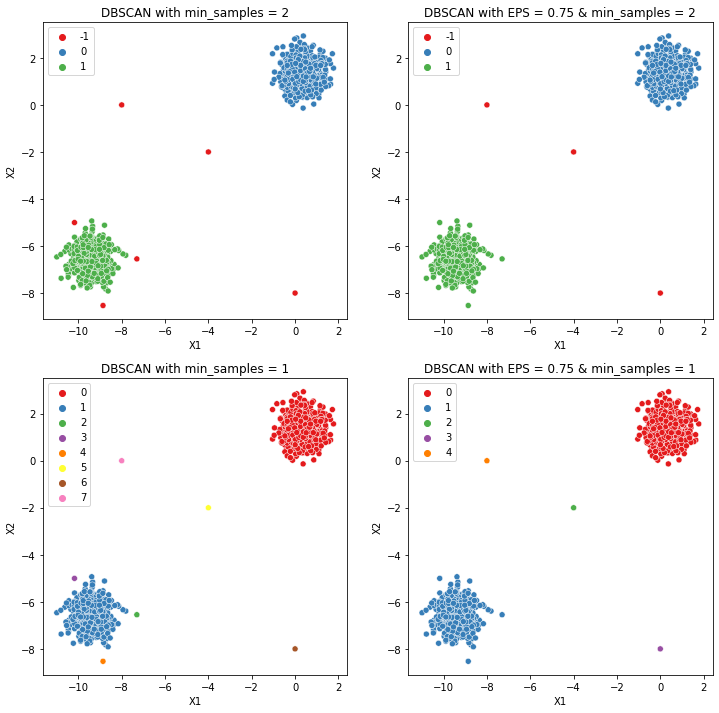

In [156]:
num_dim = two_blobs_outliers.shape[1] # (num of columns)

dbscan1 = DBSCAN(min_samples=2*num_dim)
dbscan2 = DBSCAN(eps=0.75,min_samples=2*num_dim)
dbscan3 = DBSCAN(min_samples=1)
dbscan4 = DBSCAN(eps=0.75,min_samples=1)

fig,axes = plt.subplots(2,2,figsize=(12,12))

display_categories(dbscan1,two_blobs_outliers, axes[0,0], 'DBSCAN with min_samples = 2')
display_categories(dbscan2,two_blobs_outliers, axes[0,1], 'DBSCAN with EPS = 0.75 & min_samples = 2')
display_categories(dbscan3,two_blobs_outliers, axes[1,0], 'DBSCAN with min_samples = 1')
display_categories(dbscan4,two_blobs_outliers, axes[1,1], 'DBSCAN with EPS = 0.75 & min_samples = 1')